# SETI Example Notebook
### Intro2Astro 2020

**Written by Sofia Sheikh**

This notebook is pretty sparsely documented because Sofia was lecturing over it in real time. For more detailed descriptions of the code and the theory behind this notebook, check out the Finding_ETI and Finding_Voyager notebooks!

## Relevant Imports

In [1]:
%matplotlib inline

In [2]:
import turbo_seti
import blimpy
from blimpy import Waterfall
import turbo_seti.find_doppler.seti_event as turbo
import turbo_seti.find_event as find
import matplotlib.pyplot as plt
import numpy as np

(Mistake in file-naming, but header is correct - 732c was actually a second observation of 738b)

## Examining our data

In [3]:
h5_filelist = ["dicedspliced_blc1011121314151617_guppi_58202_44201_kepler738b_0013.gpuspec.0000.h5",
               "dicedspliced_blc1011121314151617_guppi_58202_45140_kepler1039b_0015.gpuspec.0000.h5",
               "dicedspliced_blc1011121314151617_guppi_58202_45588_kepler732c_0016.gpuspec.0000.h5"]

Loading in the files in the B-A-B cadence...

In [4]:
first_obs = Waterfall(h5_filelist[0])
second_obs = Waterfall(h5_filelist[1])
third_obs = Waterfall(h5_filelist[0])

In [5]:
#?Waterfall

In [6]:
print("Data Header Information:\n", third_obs.header)
print("\n \nData Shape:\n", np.shape(third_obs.data))

Data Header Information:
 {'DIMENSION_LABELS': array([b'frequency', b'feed_id', b'time'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 1527.83203125, 'foff': -2.7939677238464355e-06, 'machine_id': 20, 'nbits': 32, 'nchans': 1048576, 'nifs': 1, 'source_name': 'kepler738b', 'src_dej': <Angle 46.56666722 deg>, 'src_raj': <Angle 19.16666028 hourangle>, 'telescope_id': 6, 'tsamp': 18.253611008, 'tstart': 58202.51158564815, 'za_start': 0.0}

 
Data Shape:
 (16, 1, 1048576)


In [7]:
third_obs.info()


--- File Info ---
DIMENSION_LABELS : [b'frequency' b'feed_id' b'time']
        az_start :                              0.0
       data_type :                                1
            fch1 :                1527.83203125 MHz
            foff :      -2.7939677238464355e-06 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                          1048576
            nifs :                                1
     source_name :                       kepler738b
         src_dej :                     46:34:00.002
         src_raj :                     19:09:59.977
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2018-03-25T12:16:41.000
    tstart (MJD) :                58202.51158564815
        za_start :                              0.0

Num ints in file :                               16
      File shape :                 (16, 1, 

In [8]:
plt.figure(figsize=(8, 6))
plt.subplot(3,1,1)
first_obs.plot_spectrum(logged=True)
plt.subplot(3,1,2)
second_obs.plot_spectrum(logged=True)
plt.subplot(3,1,3)
third_obs.plot_spectrum(logged=True)
plt.tight_layout()

extracting integration 0...
extracting integration 0...
extracting integration 0...


In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
first_obs.plot_waterfall()
plt.subplot(3,1,2)
second_obs.plot_waterfall()
plt.subplot(3,1,3)
third_obs.plot_waterfall()
plt.tight_layout()


## Finding "Hits" in the data

In [10]:
max_drift_rate = 1 #Hz/s
signal_to_noise = 100

In [11]:
for file in h5_filelist:
    print("working on " + file)
    find_seti_event = turbo.FindDoppler(file,
                                        max_drift=max_drift_rate, 
                                        snr=signal_to_noise)
    find_seti_event.search()
print("worked on all files")

working on dicedspliced_blc1011121314151617_guppi_58202_44201_kepler738b_0013.gpuspec.0000.h5
working on dicedspliced_blc1011121314151617_guppi_58202_45140_kepler1039b_0015.gpuspec.0000.h5
working on dicedspliced_blc1011121314151617_guppi_58202_45588_kepler732c_0016.gpuspec.0000.h5
worked on all files


Let's check out the .dats and .logs!

## Finding "Events" in the Hits

In [12]:
check_zero_drift = True
filter_threshold = 0.3
SNR_cut = 100

In [13]:
?find.find_events

In [14]:
dat_file_list = ["dicedspliced_blc1011121314151617_guppi_58202_44201_kepler738b_0013.gpuspec.0000.dat", 
                 "dicedspliced_blc1011121314151617_guppi_58202_45140_kepler1039b_0015.gpuspec.0000.dat",
                 "dicedspliced_blc1011121314151617_guppi_58202_45588_kepler732c_0016.gpuspec.0000.dat"]

event_dataframe = find.find_events(dat_file_list
                       ,SNR_cut=SNR_cut
                       ,check_zero_drift=check_zero_drift
                       ,filter_threshold=filter_threshold
                       ,on_off_first='OFF'
                      )

# name = "kepler1039b"
# id_num = "0015"

# if check_zero_drift == True:
#     event_csv_string = name + '_' + id_num + '_f' + str(filter_threshold) + '_snr' + str(SNR_cut) + '_zero' + '.csv'
# else:
#     event_csv_string = name + '_' + id_num + '_f' + str(filter_threshold) + '_snr' + str(SNR_cut) + '.csv'

------   o   -------
Loading data...


IndexError: list index out of range

In [10]:
event_dataframe

,TopHitNum,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,...,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range,delta_t
91,92,0.009566,201.734876,1526.992648,300427,1526.993059,1526.992243,1,101034,dicedspliced_blc1011121314151617_guppi_58202_4...,...,58202.522453703707,19h52m59.978s,45d17m59.994s,18.253611,-2.793968,,on_table_1,,0,0.0


In [39]:
event_dataframe.to_csv(event_csv_string)

## Plotting the events

Plotting some events for:  KEPLER1039B
There are 1 total events in the csv file kepler1039b_0015_f2_snr100_zero.csv
therefore, you are about to make 1 .png files.

*************************************************
***     The Parameters for This Plot Are:    ****
Target =  KEPLER1039B
Bandwidth =  0.0005  MHz
Time Elapsed (inc. Slew) =  1661.0  s
Middle Frequency =  1526.9926  MHz
Expected Drift =  0.0096  Hz/s
*************************************************
*************************************************



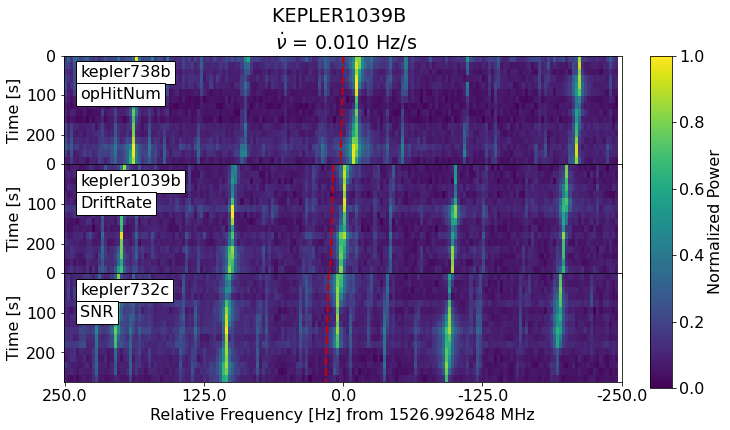

In [15]:
fils_list_string = "bab_test.lst" #just a file containing the .fil names
turbo_seti.plot_event_pipeline.plot_event_pipeline(event_csv_string, 
                        fils_list_string,  
                        user_validation=False,
                        offset=0,
                        plot_snr=False)